In [144]:
#Setting the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [125]:
#kaggle competitions download -c google-cloud-ncaa-march-madness-2020-division-1-mens-tournament

## Team Data

In [126]:
#reading the csv file from Mteam
#sorting by the FirstD1Season to know the newest team
mteams = pd.read_csv('/Users/ari/Documents/Data Ari/Data Science/Kaggle/Google Cloud & NCAA March Madness/Mteams.csv')
mteams.sort_values('FirstD1Season', ascending=False).head()

,TeamID,TeamName,FirstD1Season,LastD1Season
366,1467,Merrimack,2020,2020
365,1466,North Alabama,2019,2020
364,1465,Cal Baptist,2019,2020
112,1213,Grand Canyon,2014,2020
161,1262,MA Lowell,2014,2020


In [127]:
#reading the csv file from Wteam
wteams = pd.read_csv('/Users/ari/Documents/Data Ari/Data Science/Kaggle/Google Cloud & NCAA March Madness/Wteams.csv')
wteams.head()

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


# Season Data

In [128]:
mseasons = pd.read_csv('/Users/ari/Documents/Data Ari/Data Science/Kaggle/Google Cloud & NCAA March Madness/Mseasons.csv')
wseasons = pd.read_csv('/Users/ari/Documents/Data Ari/Data Science/Kaggle/Google Cloud & NCAA March Madness/Wseasons.csv')
mseasons.head(5)

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


# Tourney Seed

In [129]:
mtourney_seed = pd.read_csv('/Users/ari/Documents/Data Ari/Data Science/Kaggle/Google Cloud & NCAA March Madness/MNCAATourneySeeds.csv')
wtourney_seed = pd.read_csv('/Users/ari/Documents/Data Ari/Data Science/Kaggle/Google Cloud & NCAA March Madness/WNCAATourneySeeds.csv')
mtourney_seed.head(5)

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [130]:
#Merging the column of TeamName in Mteam dataset into the women tourney seed dataset
pd.merge(wtourney_seed, wteams).head()

,Season,Seed,TeamID,TeamName
0,1998,W01,3330,Old Dominion
1,1999,W02,3330,Old Dominion
2,2000,X04,3330,Old Dominion
3,2001,Z11,3330,Old Dominion
4,2002,Y07,3330,Old Dominion


# REGULAR Compact Result

In [131]:
mregular_compact_result = pd.read_csv('/Users/ari/Documents/Data Ari/Data Science/Kaggle/Google Cloud & NCAA March Madness/MRegularSeasonCompactResults.csv')
wregular_compact_result = pd.read_csv('/Users/ari/Documents/Data Ari/Data Science/Kaggle/Google Cloud & NCAA March Madness/WRegularSeasonCompactResults.csv')
mregular_compact_result.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [132]:
#Join mteam dataset into mregular_compact_result particularly retrieve TeamName column and
#match with WteamID and LteamID
mregularcompactresult = mregular_compact_result.merge(mteams[['TeamID','TeamName']], left_on='WTeamID', right_on='TeamID') \
                              .drop('TeamID', axis=1).rename(columns={'TeamName' : 'WTeamName'}) \
                              .merge(mteams[['TeamID','TeamName']], left_on='LTeamID', right_on='TeamID') \
                              .drop('TeamID', axis=1).rename(columns={'TeamName':'LTeamName'})

In [133]:
#Join wteam dataset into wregular_compact_result particularly retrieve TeamName column and 
#match with WinTeamID and LoseTeamID
wregularcompactresult = wregular_compact_result.merge(wteams[['TeamID','TeamName']], left_on='WTeamID', right_on='TeamID') \
                       .drop('TeamID', axis=1).rename(columns={'TeamName':'WTeamName'}) \
                       .merge(wteams[['TeamID','TeamName']], left_on='LTeamID', right_on='TeamID') \
                       .drop('TeamID', axis=1).rename(columns={'TeamName':'LTeamName'})

In [134]:
#Show the join dataset result
mregularcompactresult.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName
0,1985,20,1228,81,1328,64,N,0,Illinois,Oklahoma
1,1985,33,1228,73,1328,70,H,0,Illinois,Oklahoma
2,1990,82,1112,78,1328,74,H,0,Arizona,Oklahoma
3,2011,34,1112,83,1328,60,H,0,Arizona,Oklahoma
4,1985,118,1242,82,1328,76,H,0,Kansas,Oklahoma


In [135]:
#Make a new column called Score Differential from WScore and LScore column
mregularcompactresult['ScoreDiff'] = mregularcompactresult['WScore'] - mregularcompactresult['LScore']
wregularcompactresult['ScoreDiff'] = wregularcompactresult['WScore'] - wregularcompactresult['LScore']

In [136]:
#Show the result 
wregularcompactresult.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WTeamName,LTeamName,ScoreDiff
0,1998,18,3104,91,3202,41,H,0,Alabama,Furman,50
1,2009,22,3349,66,3202,62,H,0,Rice,Furman,4
2,2008,6,3435,68,3202,51,H,0,Vanderbilt,Furman,17
3,2017,18,3141,81,3202,71,H,0,C Michigan,Furman,10
4,2008,55,3207,78,3202,58,N,0,Georgetown,Furman,20


<function matplotlib.pyplot.show(*args, **kw)>

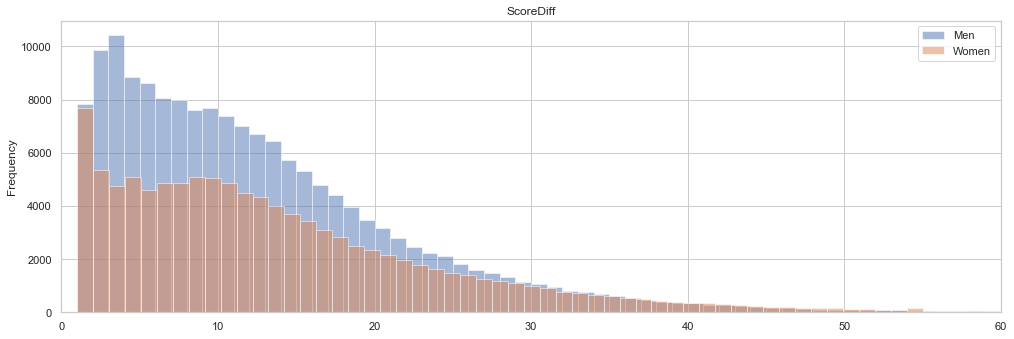

In [137]:
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(mregularcompactresult['ScoreDiff'], alpha=0.5, bins=90, label='Men')
ax.hist(wregularcompactresult['ScoreDiff'], alpha=0.5, bins=105, label='Women')
ax.set_ylabel('Frequency')
plt.title('ScoreDiff')
plt.xlim(0, 60)
plt.legend()
plt.show

In [138]:
mregularcompactresult['counter'] = 1
wregularcompactresult['counter'] = 1

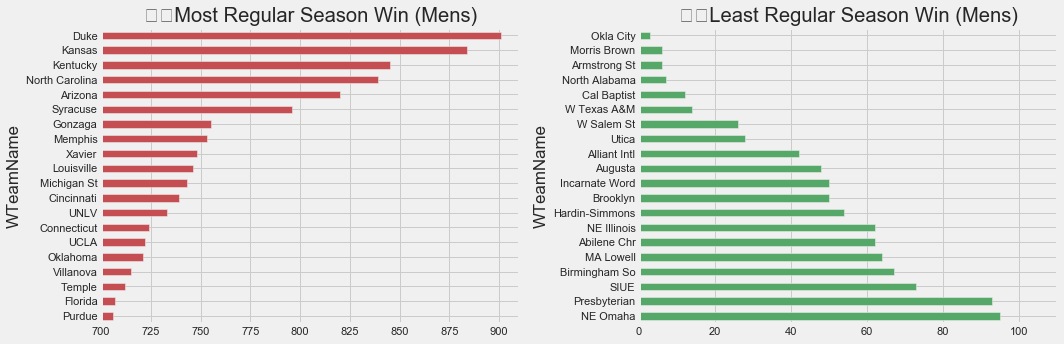

In [145]:
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(1, 2, figsize=(15,5))
mregularcompactresult.groupby('WTeamName')['counter'].count().sort_values().tail(20).plot(kind='barh', \
                     title='⬆️Most Regular Season Win (Mens)', xlim=(700, 910), color='r', ax=ax[0])
mregularcompactresult.groupby('WTeamName')['counter'].count().sort_values(ascending=False).tail(20).plot(kind='barh', \
                     title='⬇️Least Regular Season Win (Mens)', xlim=(0, 110), color='g', ax=ax[1])
plt.tight_layout()
plt.show()

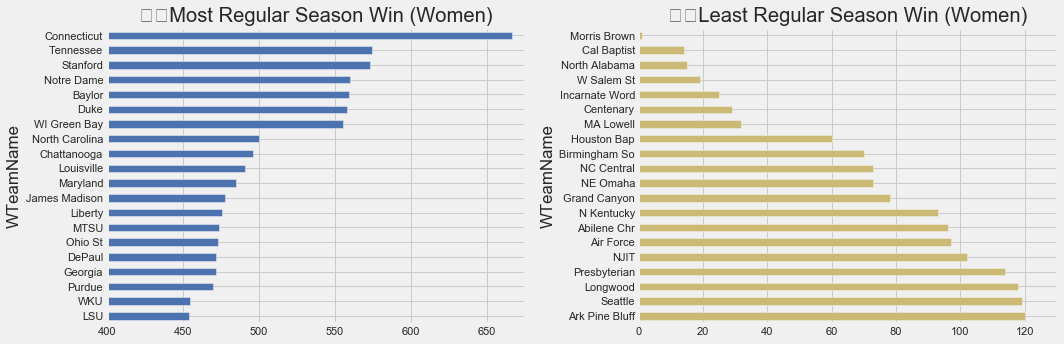

In [146]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(1, 2, figsize=(15,5))
wregularcompactresult.groupby('WTeamName')['counter'].count().sort_values().tail(20).plot(kind='barh', \
                      title='⬆️Most Regular Season Win (Women)', xlim=(400, 675), color='b', ax=ax[0])
wregularcompactresult.groupby('WTeamName')['counter'].count().sort_values(ascending=False).tail(20).plot(kind='barh',\
                      title='⬇️Least Regular Season Win (Women)', xlim=(0, 130), color='y', ax=ax[1])
plt.tight_layout()
plt.show()

# Event Data

In [147]:
Directory = '/Users/ari/Documents/Data Ari/Data Science/Kaggle/Google Cloud & NCAA March Madness'
years = [2015, 2016, 2017, 2018, 2019]

In [237]:
#Total Men Event from 2015 - 2019
mevent_total = []
for year in years:
    mevent_total.append(pd.read_csv(f'{Directory}/MEvents{year}.csv'))
    
mevent_totals = pd.concat(mevent_total, axis=0)
mevent_totals.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,100,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,11784,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,0,27,1420,11789,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,0,27,1420,11803,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,0,0,59,1103,87,made2,jump,0,0,0


In [149]:
#Total Women Event from 2015 - 2019
wevent_total = []
for year in years:
    wevent_total.append(pd.read_csv(f'{Directory}/WEvents{year}.csv'))
wevent_totals = pd.concat(wevent_total, axis=0)
wevent_totals.head()

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,3103,3127,80,49,0,0,11,3103,95,miss2,lay,0,0,0
1,2,2015,11,3103,3127,80,49,0,0,11,3103,84,reb,off,0,0,0
2,3,2015,11,3103,3127,80,49,0,0,14,3103,84,made2,lay,0,0,0
3,4,2015,11,3103,3127,80,49,0,0,42,3127,823,miss2,jump,0,0,0
4,5,2015,11,3103,3127,80,49,0,0,42,3103,91,reb,def,0,0,0


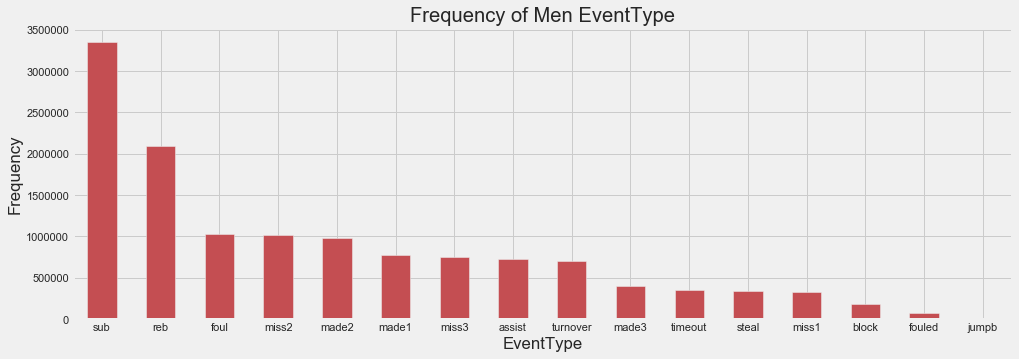

In [150]:
#Finding an insight from EventType start from 2015 - 2019, one for men and one for women
mevent_totals['counter'] = 1
mevent_totals.groupby('EventType')['counter'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), color='r')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('Frequency of Men EventType')
plt.show()

In [ ]:
wevent_totals.head()

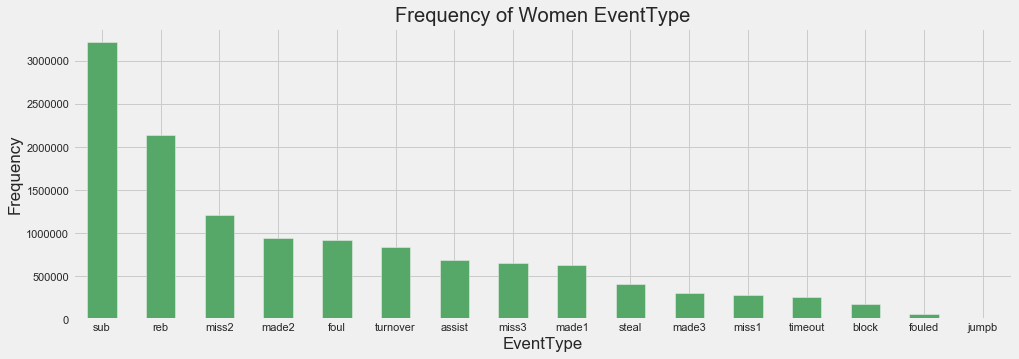

In [151]:
wevent_totals['counter'] = 1
wevent_totals.groupby('EventType')['counter'].count().sort_values(ascending=False).plot(kind='bar', color='g', \
                                              figsize=(15,5))
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('Frequency of Women EventType')
plt.show()

In [152]:
men = mevent_totals.groupby('EventType')['counter'].count().sort_values(ascending=False).reset_index()
women = wevent_totals.groupby('EventType')['counter'].count().sort_values(ascending=False).reset_index()
men['Gender'] = 'Men'
women['Gender'] = 'Women'
men_women = pd.concat([men,women])
men_women.head()

,EventType,counter,Gender
0,sub,3356811,Men
1,reb,2099080,Men
2,foul,1032476,Men
3,miss2,1019422,Men
4,made2,985522,Men


Text(0.5, 1.0, 'Differential of EventType each Gender')

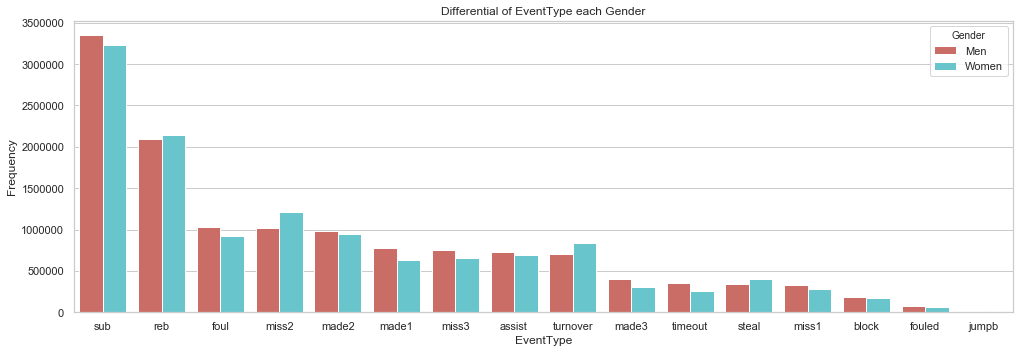

In [153]:
sns.set(style='whitegrid')
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x='EventType', y='counter', hue='Gender', data=men_women, palette="hls")
plt.ylabel('Frequency')
plt.title('Differential of EventType each Gender')

# Area of Events

In [210]:
#Making a dictionary to match the number of area into the area of court
area_mapping = {0:np.nan, 1:'under basket', 2:'in the paint', 3:'inside right wing', 4:'inside right',\
              5:'inside center', 6:'inside left', 7:'inside left wing', 8:'outside right wing',\
              9:'outside right', 10:'outside center', 11:'outside left', 12:'outside left wing', 13:'backcourt'}

In [219]:
#Matching the values of Area column in mevent_totals dataset and values from area_mapping dictionary
Area_Map1 = []
for i in mevent_totals['Area']:
    for j, k in area_mapping.items():
        if i == j:
            Area_Map1.append(k)
        else:
            j += 1
            
MArea_Map = pd.DataFrame(Area_Map1)
MArea_Map = MArea_Map.rename(columns={0:'Area_Name'})

In [220]:
MArea_Map.head()

,Area_Name
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [221]:
Mevent_totals_Area = mevent_totals[['Area','counter']].reset_index().drop('index', axis=1)
Mevent_totals_Area.head()

,Area,counter
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [222]:
Area_Mapping = pd.concat([MArea_Map,Mevent_totals_Area], axis=1)
Area_Mapping.head()

,Area_Name,Area,counter
0,NaN,0,1
1,NaN,0,1
2,NaN,0,1
3,NaN,0,1
4,NaN,0,1


Text(0.5, 1.0, 'Frequency of Area Name')

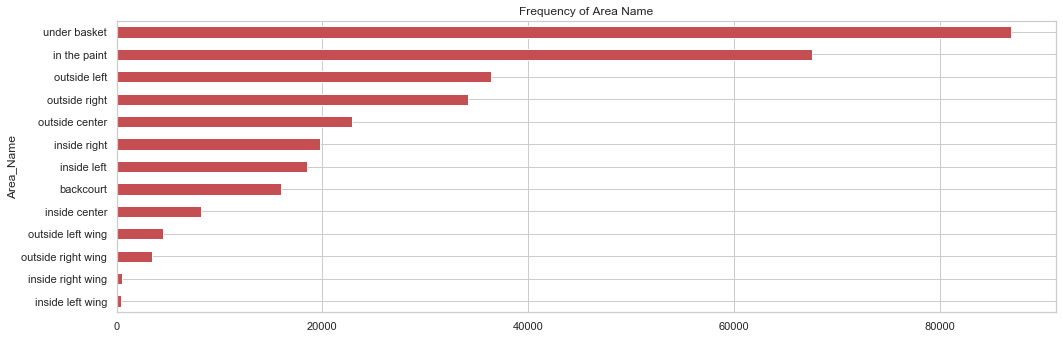

In [223]:
fig,ax = plt.subplots(figsize=(15,5))
Area_Mapping.groupby('Area_Name')['counter'].sum().sort_values().plot(kind='barh', color='r')
ax.set_title('Frequency of Area Name')

In [248]:
#Take X and Y column from mevent_totals dataset and concat with Area_Mapping datasets
x_y = mevent_totals[['X','Y']].reset_index().drop('index', axis=1)
mevent_totals_new = pd.concat([x_y, Area_Mapping], axis=1)
mevent_totals_new.head()

,X,Y,Area_Name,Area,counter
0,0,0,NaN,0,1
1,0,0,NaN,0,1
2,0,0,NaN,0,1
3,0,0,NaN,0,1
4,0,0,NaN,0,1


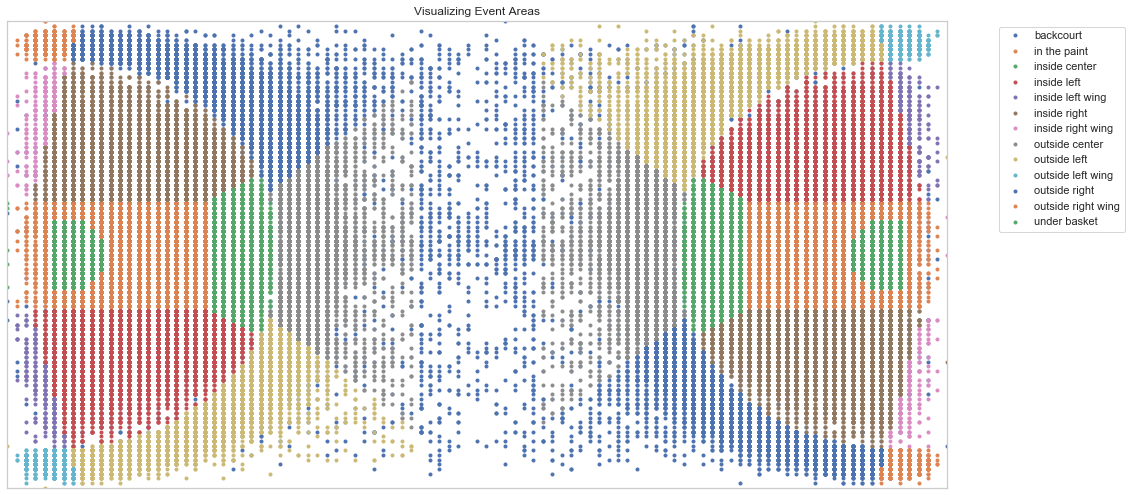

In [254]:
fig, ax = plt.subplots(figsize=(15, 8))
for i, d in mevent_totals_new.loc[~mevent_totals_new['Area_Name'].isna()].groupby('Area_Name'):
    d.plot(x='X', y='Y', style='.', label=i, ax=ax, title='Visualizing Event Areas')
    ax.legend()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.show()